Importation of modules and functions
===

In [1]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import datetime
import random
import warnings

# Functions
sys.path.insert(0, './implementations/')
from implementations import *
from preprocessing import *
from pca import *
from plot import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

Data loading
===

In [2]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")
(t_labels, t_data_raw, t_ids) = load_csv_data("data/test.csv")

Data filtering and standardization
===

In [3]:
# spliting the data into train and test sets
tx, y, tx_t, y_t = split_data(data_raw, labels_raw)

#processing the data by removing outliers and standerizing
tx, tx_t = process_data(tx, tx_t)

print("Performing PCA and keeping feature explaining 95% of the variance")  
eigVal, eigVec, sumEigVal = PCA(tx, threshold = 0.95)
tx = tx.dot(eigVec)
tx_t = tx_t.dot(eigVec)
print("Reducing the number of PCA to {0}".format(eigVec.shape[1]))
    
print("Adding a columns of ones to the dataset")
y, tx = build_model_data(tx, y)
y_t, tx_t = build_model_data(tx_t, y_t)

Filtering features
Finding and replacing outliers by column mean
Replacing NaN points with feature mean value
Standerizing the data
Performing PCA and keeping feature explaining 95% of the variance
Reducing the number of PCA to 21
Adding a columns of ones to the dataset


Linear regression with gradient descent (GD)
===

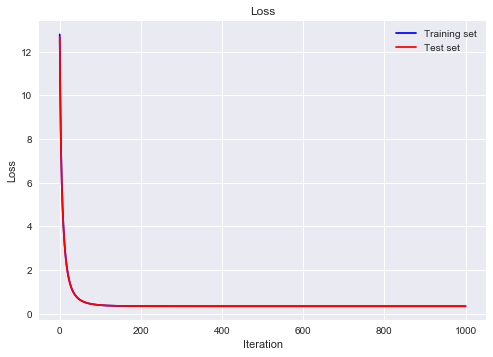

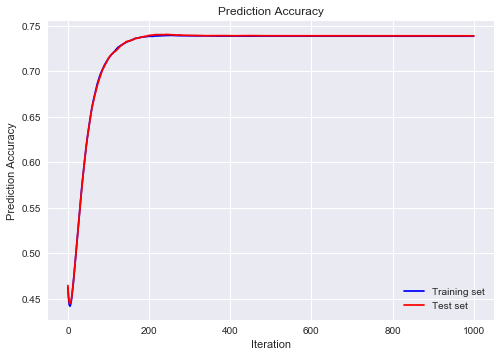

In [4]:
# Initialize w vector
initial_w = np.ones(tx.shape[1])

# Perform linear regression by gradient descent
loss_tr, loss_ts, acc_tr, acc_ts, ws = least_squares_GD(y, tx, y_t, tx_t, initial_w, gamma = 0.05, k=0, max_iters = 1000)


plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

Linear regression with stochastic gradient descent (SGD)
===

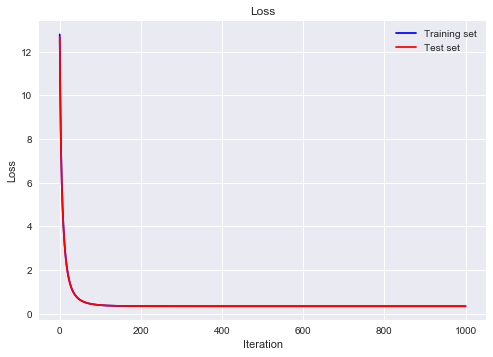

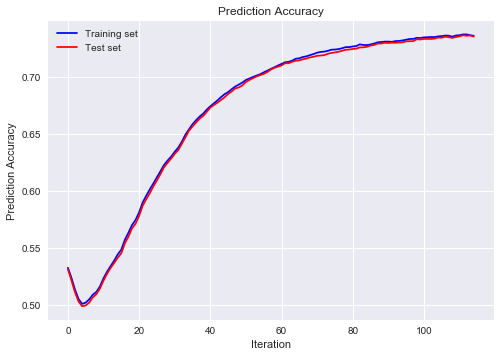

In [5]:
initial_w = np.random.rand(tx.shape[1])

# fit model, retrieve parameters ws
losses_tr, losses_ts, acc_tr, acc_ts, w = least_squares_SGD(y, tx, y_t, tx_t, initial_w, max_iters = 250, tol = 1e-4, patience = 5)

plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)


Linear regression using least squares normal equations
===

In [6]:
w = least_squares(y, tx, k =0)

train_pred_lab = predict_labels(w, tx)
acc_tr = pred_accuracy(train_pred_lab, y)

test_pred_lab = predict_labels(w, tx_t)
acc_ts = pred_accuracy(test_pred_lab, y_t)

loss_tr = np.sqrt(2 * compute_loss(y, tx, w))
loss_ts = np.sqrt(2 * compute_loss(y_t, tx_t, w))

print("train loss : {0} | test loss : {1}".format(loss_tr,loss_ts))
print("train accuracy : {0} \t | test accuracy : {1}".format(acc_tr,acc_ts))


train loss : 0.8306308159745184 | test loss : 0.8322191806433329
train accuracy : 0.738685 	 | test accuracy : 0.73908


Linear regression using the normal equations with additional polynomial degrees
===

degree: 1 	 rmse_ts: 0.8322191806433329 	  pred_ts: 0.73908
degree: 2 	 rmse_ts: 0.787057635478692 	  pred_ts: 0.784
degree: 3 	 rmse_ts: 0.782321823568777 	  pred_ts: 0.78654
degree: 4 	 rmse_ts: 0.774907523916673 	  pred_ts: 0.79144
degree: 5 	 rmse_ts: 0.7723723046255447 	  pred_ts: 0.79346
degree: 6 	 rmse_ts: 0.7719177825738435 	  pred_ts: 0.7939
degree: 7 	 rmse_ts: 0.7711138003929955 	  pred_ts: 0.79408
degree: 8 	 rmse_ts: 0.7701917079755563 	  pred_ts: 0.7942
degree: 9 	 rmse_ts: 0.7708773529131183 	  pred_ts: 0.7947


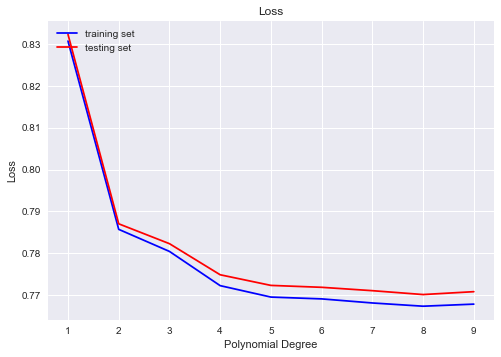

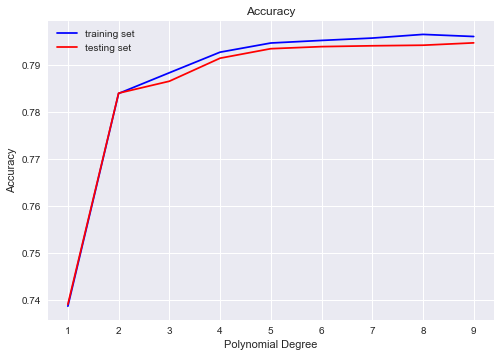

In [7]:
degrees = range(1,10)
rmse_tr = np.zeros(len(degrees))
rmse_ts = np.zeros(len(degrees))
pred_tr = np.zeros(len(degrees))
pred_ts = np.zeros(len(degrees))


for ind, degree in enumerate(degrees):
    #train the model
    tx_poly = build_poly(tx,degree)
    tx_t_poly = build_poly(tx_t,degree)
    
    w = least_squares(y, tx_poly)
    rmse_tr[ind] = (np.sqrt(2 * compute_loss(y, tx_poly, w)))
    pred_tr[ind] = pred_accuracy(predict_labels(w, tx_poly), y)
    
    #test the model
    
    rmse_ts[ind] = (np.sqrt(2 * compute_loss(y_t, tx_t_poly, w)))
    pred_ts[ind] = (pred_accuracy(predict_labels(w, tx_t_poly), y_t))
    
    # print the update
    print("degree: {d} \t rmse_ts: {a} \t  pred_ts: {b}".format(d = degree, a = rmse_ts[ind], b = pred_ts[ind]))

    

# plot the loss
plt.style.use('seaborn')
plt.plot(degrees,rmse_tr, c='blue')
plt.plot(degrees,rmse_ts, c='red')
plt.title('Loss')
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


#plot the accuracy
plt.style.use('seaborn')
plt.plot(degrees,pred_tr, c='blue')
plt.plot(degrees,pred_ts, c='red')
plt.title('Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.show()


Linear regression using ridge regression
===

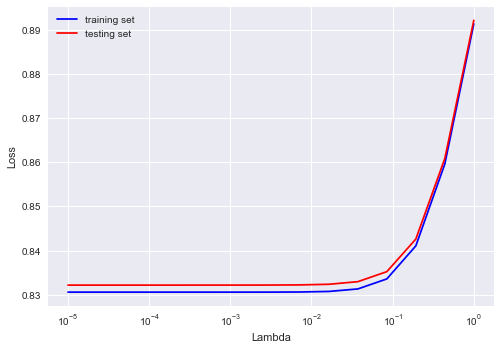

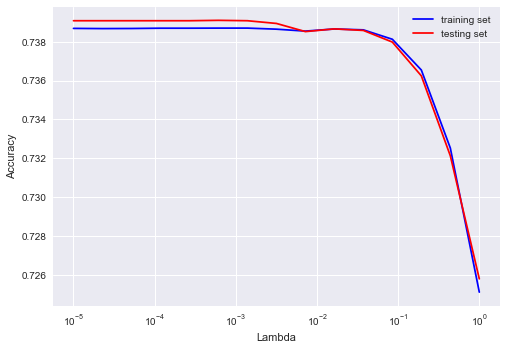

In [8]:
lambdas = np.logspace(-5, 0, 15)
rmse_tr = []
rmse_ts = []
pred_tr = []
pred_ts = []

for ind, lambda_ in enumerate(lambdas):
    
    w = ridge_regression(y, tx, lambda_)
    rmse_tr.append(np.sqrt(2 * compute_loss(y, tx, w)))
    pred_tr.append(pred_accuracy(predict_labels(w, tx),y))
    
    
    rmse_ts.append(np.sqrt(2 * compute_loss(y_t, tx_t, w)))
    pred_ts.append(pred_accuracy(predict_labels(w, tx_t),y_t))
    
plt.style.use('seaborn')
plt.semilogx(lambdas,rmse_tr, c='blue')
plt.semilogx(lambdas,rmse_ts, c='red')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred_tr, c='blue')
plt.semilogx(lambdas,pred_ts, c='red')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper right')
plt.show()

# print(np.max(pred))

# Logistic regression using gradient descent and stochastic gradient descent

## Gradient Descent


In [9]:
initial_w = np.random.rand(tx.shape[1])

# fit model, retrieve parameters ws
loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_regression(y, tx, y_t, tx_t, initial_w, method = 'gd', max_iters = 1000, gamma = 0.05) 


plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

TypeError: compute_gradient() got an unexpected keyword argument 'lam'

## Stochastic Gradient Descent

In [ ]:
initial_w = np.random.rand(tx.shape[1])

# fit model, retrieve parameters ws
loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_regression(y, tx, y_t, tx_t, initial_w, method = 'sgd', max_iters = 1000, gamma = 0.05) 


plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

# Regularized Logistic Regression

In [ ]:
lambdas = np.logspace(-10,0, 11)
losses_tr = []
losses_ts = []
pred_tr = []
pred_ts = []
initial_w = np.random.rand(tx.shape[1])

# There is a runtime warning but just be patient

for ind, lambda_ in enumerate(lambdas):
    
    loss_tr, loss_ts, acc_tr, acc_ts, w = reg_logistic_regression(y, tx, y_t, tx_t, initial_w, lamb = lambda_, method ='gd', gamma = 0.0001, max_iters=1000)
    
    best_w = ws[-1]
    
    losses_tr.append(loss_tr[-1])
    pred_tr.append(acc_tr[-1])
    
    losses_ts.append(loss_ts[-1])
    pred_ts.append(acc_ts[-1])

    

plt.style.use('seaborn')
plt.semilogx(lambdas,losses_tr, c='blue')
plt.semilogx(lambdas,losses_ts, c='red')
plt.legend(['training set', 'testing set'], loc='upper left')
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.show()

plt.style.use('seaborn')
plt.semilogx(lambdas,pred_tr, c='blue')
plt.semilogx(lambdas,pred_ts, c='red')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.legend(['training set', 'testing set'], loc='upper right')
plt.show()
####


# Logistic regression using Newton's method

The Newton's Method helps us compute the logistic regression faster.
Note that the learning rate is increased and that this function has the lembda parameter that allows
it to be regularizer or not (lam =0)

In [ ]:
initial_w = np.random.rand(tx.shape[1])

loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, gamma=5000, lam=1e-10, max_iters=200) 

plot_loss(loss_tr, loss_ts)
plot_acc(acc_tr, acc_ts)

# Varying Learning Rate (gamma) with Logistic Regression

In [ ]:
num_iter = 1000
lr = [500, 1000, 5000, 10000] 


initial_w = np.random.rand(tx.shape[1])

for i in range(len(lr)):
    print("Learning rate : {0}".format(lr[i]))
    loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, gamma=lr[i], lam=1e-10, max_iters=150) 
    
    titre = "learning rate "+str(lr[i])
    plt.show(plotCurves(loss_tr, acc_tr, loss_ts, acc_ts, titre))


